<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/06_(1)1970%EB%85%84%EB%8C%80_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1970년대 보스턴 주택가격 예측하는 회귀 문제

## 보스턴 주택가격 데이터 준비하기

In [ ]:
from keras.datasets.boston_housing import load_data

#데이터 다운로드( 훈련셋 80 : 테스트셋 20 )
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split=0.2, seed=777)

## 데이터 형태 확인하기

In [ ]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

X_train.shape (404, 13)
y_train.shape (404,)


In [ ]:
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_test.shape (102, 13)
y_test.shape (102,)


## 데이터 전처리(feature) 표준화(Standardzation)

In [ ]:
import numpy as np

# (데이터 - 전체평균) / 표준편차
mean = np.mean( X_train, axis=0)
std = np.std(X_train, axis=0)


In [ ]:
# 전처리(X_train, X_test) 둘다 처리
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

print(X_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


## 검증 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=777)

print(X_train.shape, X_val.shape)

(270, 13) (134, 13)


## 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1)) # activation='linear'

## 모델 설정하기

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae','mse'])

## 모델 학습하기

In [ ]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
9/9 [==============================] - 3s 74ms/step - loss: 527.4619 - mae: 21.2243 - mse: 527.4619 - val_loss: 576.0817 - val_mae: 21.6643 - val_mse: 576.0817
Epoch 2/300
9/9 [==============================] - 0s 12ms/step - loss: 500.3054 - mae: 20.5772 - mse: 500.3054 - val_loss: 544.8913 - val_mae: 20.9347 - val_mse: 544.8913
Epoch 3/300
9/9 [==============================] - 0s 13ms/step - loss: 469.0765 - mae: 19.8033 - mse: 469.0765 - val_loss: 508.8467 - val_mae: 20.0464 - val_mse: 508.8467
Epoch 4/300
9/9 [==============================] - 0s 17ms/step - loss: 431.6134 - mae: 18.8574 - mse: 431.6134 - val_loss: 465.2304 - val_mae: 18.9334 - val_mse: 465.2304
Epoch 5/300
9/9 [==============================] - 0s 14ms/step - loss: 387.5142 - mae: 17.6861 - mse: 387.5142 - val_loss: 410.8281 - val_mae: 17.4990 - val_mse: 410.8281
Epoch 6/300
9/9 [==============================] - 0s 12ms/step - loss: 331.7255 - mae: 16.2097 - mse: 331.7255 - val_loss: 348.4935 - val_m

## 모델 학습 결과 분석

In [ ]:
history.history

{'loss': [527.4618530273438,
  500.3053894042969,
  469.0765075683594,
  431.6133728027344,
  387.51416015625,
  331.7254943847656,
  270.5733947753906,
  206.91177368164062,
  146.63072204589844,
  101.14397430419922,
  70.7338638305664,
  55.613250732421875,
  46.52546691894531,
  39.10928726196289,
  33.32034683227539,
  29.35055160522461,
  26.43861198425293,
  24.47793960571289,
  23.029539108276367,
  21.870899200439453,
  20.986358642578125,
  20.22844123840332,
  19.632884979248047,
  19.131311416625977,
  18.641611099243164,
  18.18011474609375,
  17.865917205810547,
  17.397722244262695,
  17.074539184570312,
  16.797937393188477,
  16.430923461914062,
  16.19493865966797,
  15.876256942749023,
  15.671457290649414,
  15.41083812713623,
  15.176309585571289,
  15.054295539855957,
  14.830092430114746,
  14.636361122131348,
  14.398494720458984,
  14.218352317810059,
  14.0509672164917,
  13.90722942352295,
  13.800224304199219,
  13.60794734954834,
  13.540780067443848,
  13.

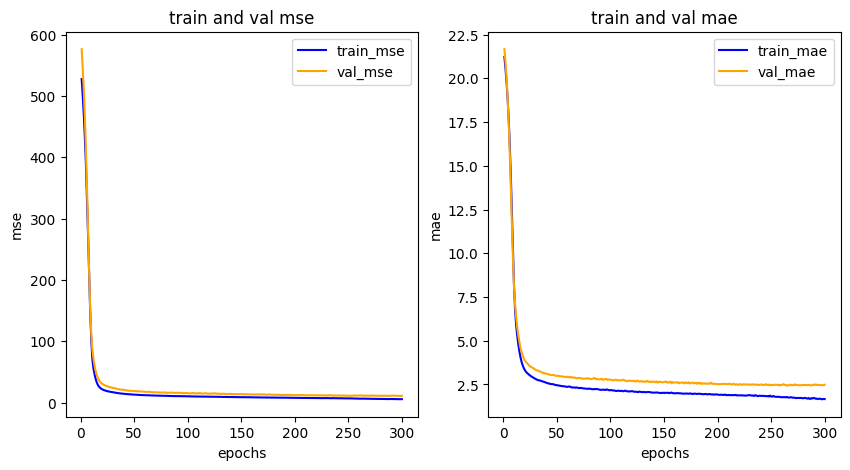

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
model.evaluate(X_test, y_test) #2.21921706199646 -> 실제 집값과 2,200 달러 정도 차이로 집값 예측

4/4 [==============================] - 0s 6ms/step - loss: 9.7001 - mae: 2.2642 - mse: 9.7001


[9.700126647949219, 2.2641754150390625, 9.700126647949219]

## 모델 예측하고 결과 확인

4/4 [==============================] - 0s 4ms/step


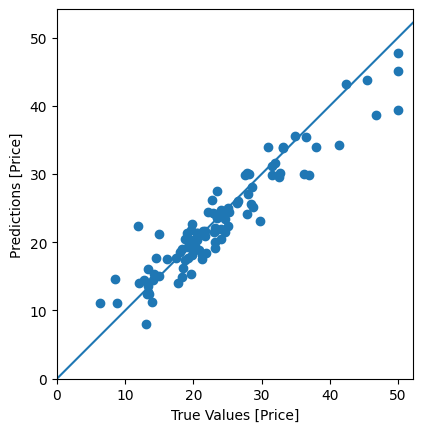

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## K-Fold 사용하여 학습하기

*   학습 데이터 부족으로 성능이 낮은 경우 적용 가능
*   검증 데이터셋을 K-Fold로 사용하여, 학습 데이터 확보


## K-Fold를 위한 데이터 준비하기

In [ ]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋:80, )
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2, seed=777)

## 데이터 전처리

In [ ]:
import numpy as np

# (데이터-전체평균)/표준편차
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# 전처리(X_train, X_test) 둘다 처리
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

## K-Fold를 사용한 모델 학습

In [ ]:
from sklearn.model_selection import KFold

# 3-Fold로 나눠서 검증데이터셋 사용하여 학습
k = 3

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model():
  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1)) # activation='linear'

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

# 각 모델(KFold)의 평가 정보 담는 리스트 선언
mae_list=[]

# k번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train):
  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  #모델 불러오기
  model = get_model()

  #모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  #모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)


Epoch 1/300
9/9 [==============================] - 1s 44ms/step - loss: 600.5870 - mae: 22.6906 - val_loss: 574.0343 - val_mae: 22.1863
Epoch 2/300
9/9 [==============================] - 0s 12ms/step - loss: 580.5424 - mae: 22.2593 - val_loss: 556.6690 - val_mae: 21.7905
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 561.8394 - mae: 21.8448 - val_loss: 539.2457 - val_mae: 21.3787
Epoch 4/300
9/9 [==============================] - 0s 10ms/step - loss: 542.5553 - mae: 21.3924 - val_loss: 520.3398 - val_mae: 20.9207
Epoch 5/300
9/9 [==============================] - 0s 10ms/step - loss: 520.2664 - mae: 20.8707 - val_loss: 498.0829 - val_mae: 20.3700
Epoch 6/300
9/9 [==============================] - 0s 9ms/step - loss: 493.6122 - mae: 20.2293 - val_loss: 470.2147 - val_mae: 19.6647
Epoch 7/300
9/9 [==============================] - 0s 10ms/step - loss: 460.3114 - mae: 19.3851 - val_loss: 434.7587 - val_mae: 18.7474
Epoch 8/300
9/9 [==============================] 

In [ ]:
mae_list

[2.108198642730713, 2.0035722255706787, 2.19335675239563]

### K-Fold 사용한 모델 성능평가

In [ ]:
np.mean(mae_list) # 2.10 -> 실제 집값과 2100달러 차이

2.1017092068990073

## 검증 데이터셋 사용하지 않고 학습한 모델 성능평가

In [ ]:
# 데이터 다운로드 (훈련셋: 80, 테스트셋: 20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split = 0.2, seed = 777)

# (데이터-전체평균)/표준편차
mean= np.mean(X_train, axis = 0) # [데이터]의 평균이기 때문에 axis는 0
std = np.std(X_train, axis = 0)

# 전처리(X_train, X_test) 둘 다 처리
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', # 옵티마이저
              loss = 'mse', # mean squared error
              metrics = ['mae'])

model.fit(X_train, y_train, epochs = 300)

model.evaluate(X_test, y_test)

Epoch 1/300
13/13 [==============================] - 1s 2ms/step - loss: 580.3450 - mae: 22.2036
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 537.5744 - mae: 21.2581
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 489.9855 - mae: 20.1333
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 429.8871 - mae: 18.6276
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 351.4822 - mae: 16.6269
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 262.5403 - mae: 14.1131
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 170.5217 - mae: 11.0445
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 98.2375 - mae: 8.0197
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 61.6458 - mae: 6.1768
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 46.3464 - mae: 5.1844
Epoch 11/300
13/13 [===============

[7.818188190460205, 1.9548412561416626]

In [ ]:
model.evaluate(X_test, y_test)

## 4_Fold, 5_Fold 사용한 모델의 성능평가

### 4_Fold 사용한 모델의 성능평가

In [ ]:
from sklearn.model_selection import KFold

# 3-Fold로 나눠서 검증데이터셋 사용하여 학습
k = 4

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model():
  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1)) # activation='linear'

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

# 각 모델(KFold)의 평가 정보 담는 리스트 선언
mae_list=[]

# k번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train):
  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  #모델 불러오기
  model = get_model()

  #모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  #모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)


Epoch 1/300
10/10 [==============================] - 1s 26ms/step - loss: 571.8375 - mae: 22.0242 - val_loss: 532.3903 - val_mae: 21.3214
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 534.6610 - mae: 21.1588 - val_loss: 500.7622 - val_mae: 20.5361
Epoch 3/300
10/10 [==============================] - 0s 8ms/step - loss: 493.5676 - mae: 20.2020 - val_loss: 462.5821 - val_mae: 19.5652
Epoch 4/300
10/10 [==============================] - 0s 9ms/step - loss: 443.1696 - mae: 18.9641 - val_loss: 414.4167 - val_mae: 18.3183
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 383.2162 - mae: 17.4499 - val_loss: 356.8911 - val_mae: 16.7516
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 313.9973 - mae: 15.6071 - val_loss: 293.6237 - val_mae: 14.9034
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 241.6372 - mae: 13.5075 - val_loss: 228.5106 - val_mae: 12.9314
Epoch 8/300
10/10 [=====================

In [ ]:
np.mean(mae_list) # 2.12 -> 실제 집값과 2120달러 차이

2.126855343580246

### 5_Fold 사용한 모델의 성능평가

In [ ]:


# 3-Fold로 나눠서 검증데이터셋 사용하여 학습
k = 5

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model():
  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1)) # activation='linear'

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

# 각 모델(KFold)의 평가 정보 담는 리스트 선언
mae_list=[]

# k번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train):
  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  #모델 불러오기
  model = get_model()

  #모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  #모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)


Epoch 1/300
11/11 [==============================] - 1s 20ms/step - loss: 565.9960 - mae: 21.8817 - val_loss: 522.8873 - val_mae: 21.2264
Epoch 2/300
11/11 [==============================] - 0s 7ms/step - loss: 529.9065 - mae: 21.1141 - val_loss: 493.4864 - val_mae: 20.5383
Epoch 3/300
11/11 [==============================] - 0s 7ms/step - loss: 489.0301 - mae: 20.1892 - val_loss: 456.8016 - val_mae: 19.6507
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 436.5831 - mae: 18.9572 - val_loss: 406.7953 - val_mae: 18.3795
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: 373.6809 - mae: 17.3493 - val_loss: 346.4913 - val_mae: 16.7195
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 300.1676 - mae: 15.2807 - val_loss: 280.0419 - val_mae: 14.6636
Epoch 7/300
11/11 [==============================] - 0s 7ms/step - loss: 227.0932 - mae: 12.8976 - val_loss: 214.5499 - val_mae: 12.4082
Epoch 8/300
11/11 [=====================

In [ ]:
np.mean(mae_list) # 2.03 -> 실제 집값과 약 2000달러 차이

2.0391984462738035